# Методы обнаружения выбросов

(основанные на машинном обучении)

*Александр Дьяконов, 2017*

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

%pylab inline

# чтобы был русский шрифт
from matplotlib import rc
 
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


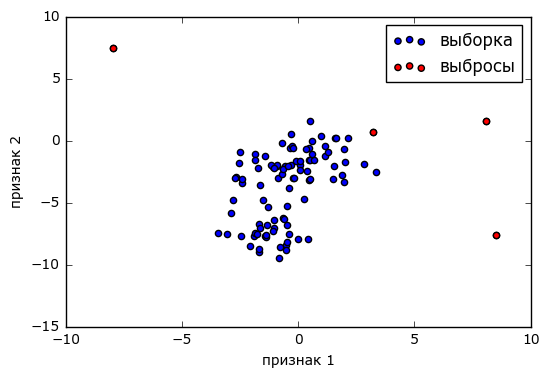

In [3]:
n = 100 # длина выборки
n_out = 5 # число выбросов

#np.random.RandomState(1)

from sklearn.datasets import make_blobs
X = make_blobs(n_samples=n, n_features=2, centers=3, random_state=2, center_box=(-8.0, 8.0))[0]
X[:n_out,:] = 20*np.random.rand(n_out, 2) - 10
y = np.ones(n)
y[:n_out] = -1
plt.scatter(X[:,0], X[:,1], c='#0000FF', label='выборка')
plt.scatter(X[:n_out,0], X[:n_out,1], c='#FF0000', label='выбросы')
plt.xlabel(u'признак 1')
plt.ylabel('признак 2')
plt.legend()

In [4]:
xx, yy = np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-10, 10, 500))
outliers_fraction = 0.1
classifiers = {
    "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05, kernel="rbf", gamma=0.1),
    "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
    "Isolation Forest": IsolationForest(max_samples=n, contamination=outliers_fraction, random_state=1)}

In [7]:
# для рисования областей
def run_and_plot(clf, X, outliers_fraction, draw_legend=True, title=''):
    clf.fit(X)
    print (clf)
    
    a_prob =  clf.decision_function(X)
    threshold = stats.scoreatpercentile(a_prob, 100 * outliers_fraction)
    
    #print (a_prob)
    
    print ('ошибка  = ' + str( (clf.predict(X) != y).mean()))

    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    #print (Z)

    plt.figure(figsize=(5, 5))
    #plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 20), cmap=plt.cm.binary) # plt.cm.Blues_r cmap=plt.cm.Blues_r)
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 20), cmap=plt.cm.binary) # plt.cm.Blues_r cmap=plt.cm.Blues_r)
    a_ = plt.contour(xx, yy, Z, levels=[threshold], linewidths=1, colors='yellow')
    #plt.contourf(xx, yy, Z, levels=[threshold, Z.max()], colors='#CCDDFF') # CCDDFF
    b_ = plt.scatter(X[y>0, 0], X[y>0, 1], c='white')
    c_ = plt.scatter(X[y<0, 0], X[y<0, 1], c='red')
    plt.axis('tight')
    if draw_legend:
        plt.legend(
            [a_.collections[0], b_, c_],
            [u'разделяющая поверхность', u'нормальные объекты', u'выбросы'],
            prop=matplotlib.font_manager.FontProperties(size=11), loc='upper right')
    plt.title(title)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.1, kernel='rbf',
      max_iter=-1, nu=0.14500000000000002, random_state=None,
      shrinking=True, tol=0.001, verbose=False)
ошибка  = 0.1


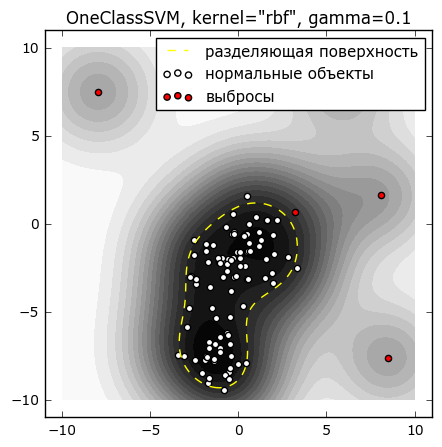

In [12]:
clf = svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05, kernel="rbf", gamma=0.1)

run_and_plot(clf, X, outliers_fraction=outliers_fraction, draw_legend=True, title='OneClassSVM, kernel="rbf", gamma=0.1')

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='poly',
      max_iter=-1, nu=0.14500000000000002, random_state=None,
      shrinking=True, tol=0.001, verbose=False)
ошибка  = 0.6


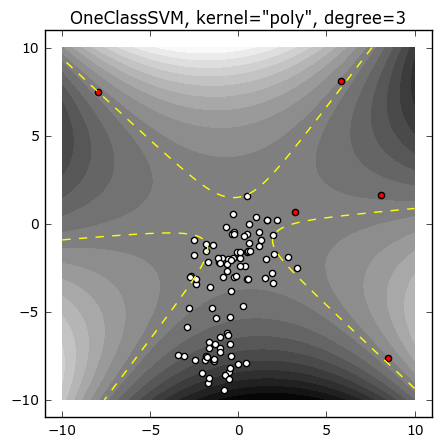

In [9]:
clf = svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05, kernel="poly", degree=3)
run_and_plot(clf, X, outliers_fraction=outliers_fraction, draw_legend=False, title='OneClassSVM, kernel="poly", degree=3')

IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)
ошибка  = 0.05


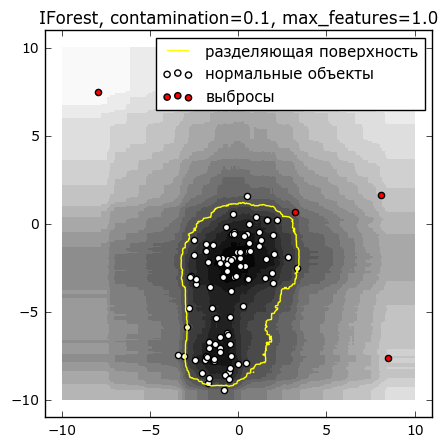

In [11]:
clf  = IsolationForest(n_estimators=n, max_samples='auto', contamination=0.1, max_features=1.0,
                       bootstrap=False, n_jobs=1, random_state=None, verbose=0)

run_and_plot(clf, X, outliers_fraction=outliers_fraction, draw_legend=True, title='IForest, contamination=0.1, max_features=1.0')

EllipticEnvelope(assume_centered=False, contamination=0.2, random_state=None,
         store_precision=True, support_fraction=None)
ошибка  = 0.17


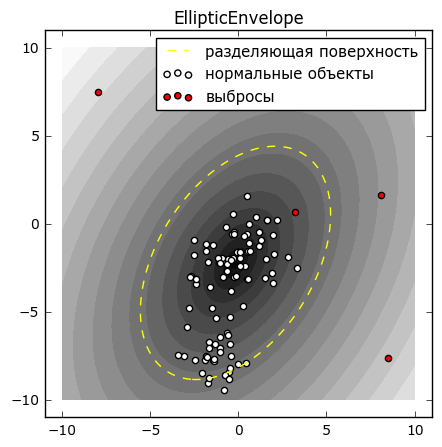

In [13]:
clf = EllipticEnvelope(store_precision=True, assume_centered=False, support_fraction=None, contamination=0.2, random_state=None)

run_and_plot(clf, X, outliers_fraction=outliers_fraction, draw_legend=True, title='EllipticEnvelope')